In [13]:
from IPython.core.debugger import set_trace


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [14]:
df = pd.read_csv("time_series-TSLA-4h.csv", sep=";")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1576 non-null   object 
 1   open    1576 non-null   float64
 2   high    1576 non-null   float64
 3   low     1576 non-null   float64
 4   close   1576 non-null   float64
 5   volume  1576 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 74.0+ KB


In [16]:
df.head()

,date,open,high,low,close,volume
0,2022-04-19 13:30:00,1020.77002,1029.63000,1017.78003,1028.09998,4854434
1,2022-04-19 09:30:00,1005.06000,1034.93994,995.72742,1020.47498,10964970
2,2022-04-18 13:30:00,994.98993,1014.91998,994.07001,1004.70001,5399546
3,2022-04-18 09:30:00,989.03003,1009.61987,974.00000,994.61011,11192470
4,2022-04-14 13:30:00,985.06000,998.00000,984.07501,984.96002,17966136


In [17]:
df = df.sort_values(by='date')

In [18]:
df.set_index("date", drop=True, inplace=True)

We'll use only the close feature.

In [19]:
df = df[["close"]]

In [20]:
type(df["close"]) == type(df[["close"]])

False

In [21]:
type(df[["close"]])

pandas.core.frame.DataFrame

In [22]:
df.describe()

,close
count,1576.000000
mean,447.880798
std,353.429081
min,42.278000
25%,90.882000
50%,417.530345
75%,732.011260
max,1235.579960


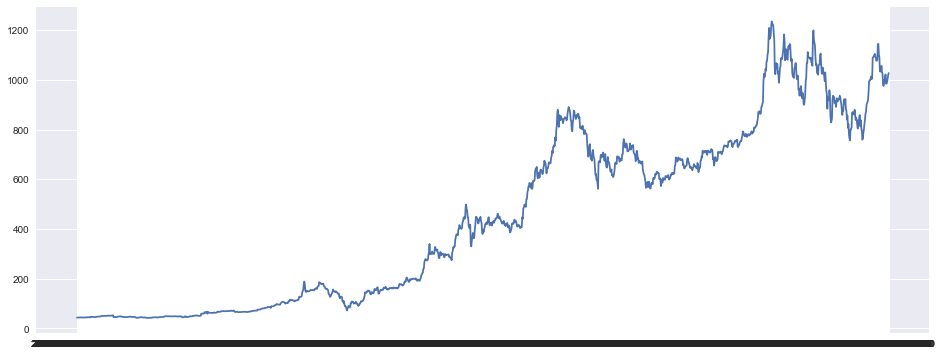

In [23]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(df.close)

Calculate the percentage change.

The reason for using pct_change instead of the prices is the benefit of normalization as we can measure all variables in a comparable metric. Also returns have more manageable statistical properties than prices such as stationarity, as in most cases we don't have stationary prices but we can have stationary returns.

A stationary time series is one where statistical properties such as mean, variance, correlation, etc are constant over time.
For more details on stationarity: https://en.wikipedia.org/wiki/Stationary_process

In [24]:
df["returns"] = df.close.pct_change()

In [25]:
df.head(5)

,close,returns
date,,
2019-06-20 08:00:00,43.75600,NaN
2019-06-20 12:00:00,43.87544,0.002730
2019-06-20 16:00:00,43.91800,0.000970
2019-06-21 08:00:00,43.80800,-0.002505
2019-06-21 12:00:00,44.24400,0.009953


In [26]:
43.75600 / 43.87544 - 1

-0.002722251902203099

Calculate the log returns.

Why use log returns: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

In [27]:
df["log_returns"] = np.log(1 + df["returns"])

In [28]:
df.head(5)

,close,returns,log_returns
date,,,
2019-06-20 08:00:00,43.75600,NaN,NaN
2019-06-20 12:00:00,43.87544,0.002730,0.002726
2019-06-20 16:00:00,43.91800,0.000970,0.000970
2019-06-21 08:00:00,43.80800,-0.002505,-0.002508
2019-06-21 12:00:00,44.24400,0.009953,0.009903


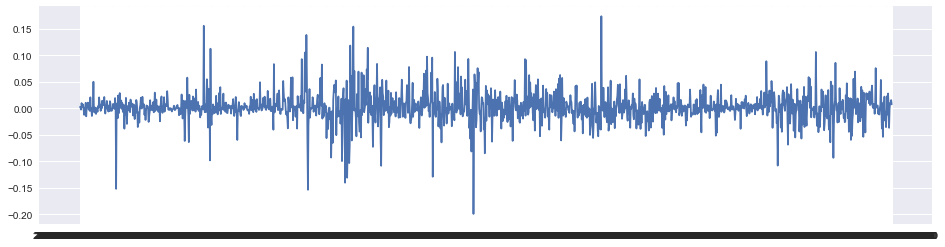

In [29]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.log_returns)

In [30]:
df.dropna(inplace=True)
X = df[["close", "log_returns"]].values

In [69]:
df

,close,returns,log_returns
date,,,
2019-06-20 12:00:00,43.87544,0.002730,0.002726
2019-06-20 16:00:00,43.91800,0.000970,0.000970
2019-06-21 08:00:00,43.80800,-0.002505,-0.002508
2019-06-21 12:00:00,44.24400,0.009953,0.009903
2019-06-21 16:00:00,44.37800,0.003029,0.003024
...,...,...,...
2022-04-14 13:30:00,984.96002,-0.000517,-0.000518
2022-04-18 09:30:00,994.61011,0.009797,0.009750
2022-04-18 13:30:00,1004.70001,0.010145,0.010093


In [65]:
X

array([[ 4.38754400e+01,  2.72596397e-03],
       [ 4.39180000e+01,  9.69548598e-04],
       [ 4.38080000e+01, -2.50780972e-03],
       ...,
       [ 1.00470001e+03,  1.00934673e-02],
       [ 1.02047498e+03,  1.55791861e-02],
       [ 1.02809998e+03,  7.44423354e-03]])

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [34]:
X_scaled[:5]

array([[0.00133867, 0.54147078],
       [0.00137434, 0.53675589],
       [0.00128216, 0.52742133],
       [0.00164753, 0.56073754],
       [0.00175982, 0.54227104]])

In [35]:
y = [x[0] for x in X_scaled]

In [36]:
y[:5]

[0.0013386720658700654,
 0.0013743378080096347,
 0.0012821566135699583,
 0.001647529347894472,
 0.0017598228029391608]

#### Train test split

In [37]:
split = int(len(X_scaled) * 0.8)
print(split)

1260


In [38]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

In [64]:
X_scaled

array([[0.00133867, 0.54147078],
       [0.00137434, 0.53675589],
       [0.00128216, 0.52742133],
       ...,
       [0.80652009, 0.56124797],
       [0.81973969, 0.57597373],
       [0.82612952, 0.55413641]])

In [39]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [40]:
X_train

array([[0.00133867, 0.54147078],
       [0.00137434, 0.53675589],
       [0.00128216, 0.52742133],
       ...,
       [0.58102812, 0.53364238],
       [0.5797376 , 0.52852775],
       [0.5810784 , 0.53999765]])

#### Labeling

We want to predict the stock price at a future time. We'll predict the stock price at time t + 1 relative to the stock price at time t.

As we're going to use an LSTM architecture, we know that it has memory and that it is maintained by setting the time step, basically how many steps in the past we want the LSTM to use.

The time step  refers to how many steps in time we want the backpropagation algorithm to use when calculating gradients for weight updates during training.

So we can use a method to create both the timestep and the output variable, the t + 1.

In [41]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i])  # predict next record

In [42]:
df.head(5)

,close,returns,log_returns
date,,,
2019-06-20 12:00:00,43.87544,0.002730,0.002726
2019-06-20 16:00:00,43.91800,0.000970,0.000970
2019-06-21 08:00:00,43.80800,-0.002505,-0.002508
2019-06-21 12:00:00,44.24400,0.009953,0.009903
2019-06-21 16:00:00,44.37800,0.003029,0.003024


In [43]:
Xtrain[0]

array([[0.00133867, 0.54147078],
       [0.00137434, 0.53675589],
       [0.00128216, 0.52742133]])

In [44]:
ytrain[0]

0.001647529347894472

In [45]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [46]:
scaler.inverse_transform(val)

array([[44.244     , -0.19898558]])

In an LSTM network the input for each LSTM layer needs to contain the following information:
- The number of observations
- The time steps
- The features

Therefore we need to add a temporal dimension compared to a classical network:

(number of observations, number of steps, number of features per step)

In [47]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [48]:
ytest

array([0.5948554 , 0.5955257 , 0.59413467, 0.59632182, 0.59873529,
       0.59715145, 0.59534136, 0.58157285, 0.5761425 , 0.58721264,
       0.58610656, 0.58850316, 0.59381617, 0.59799784, 0.59502281,
       0.59886935, 0.59867662, 0.60131638, 0.57722357, 0.57653639,
       0.58390259, 0.58417905, 0.59130214, 0.59470446, 0.59645593,
       0.59616259, 0.60693112, 0.61346754, 0.62913002, 0.62777239,
       0.6180766 , 0.6161743 , 0.61259598, 0.61931684, 0.62090069,
       0.61443122, 0.61056801, 0.61421333, 0.6192415 , 0.61955151,
       0.61518545, 0.61872184, 0.61834896, 0.62052358, 0.62440357,
       0.62962437, 0.62214093, 0.62281972, 0.62847153, 0.6282249 ,
       0.64253814, 0.63977266, 0.64316665, 0.64442366, 0.65044042,
       0.65033163, 0.66280113, 0.6710724 , 0.69451164, 0.6937322 ,
       0.69731236, 0.68874602, 0.68840236, 0.69012037, 0.71213493,
       0.71341706, 0.7227274 , 0.72689229, 0.7976707 , 0.82341438,
       0.81182477, 0.81802597, 0.84009306, 0.83430852, 0.86390

In [49]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(1257, 3, 2)
(1257,)
---
(312, 3, 2)
(312,)


#### LSTM Model

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [51]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/100
79/79 [==============================] - 14s 8ms/step - loss: 0.0440 - val_loss: 0.1177
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0331
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 7.9764e-04 - val_loss: 6.6228e-04
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 2.9966e-04 - val_loss: 7.6041e-04
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 2.6978e-04 - val_loss: 7.9228e-04
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 2.5378e-04 - val_loss: 7.3926e-04
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 2.2240e-04 - val_loss: 7.1083e-04
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 2.3918e-04 - val_loss: 6.7675e-04
Epoch 10/100
79/79 [==============================] - 0s 1ms

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.save('model.h5')